## Imports

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from skimage.segmentation import disk_level_set

## Paths

In [94]:
IMG_PATH = r'C:/Users/ginof/OneDrive - ITU/Documentos/GitHub/fyp2021p3g03/data/example_image/'
SEG_PATH = r'C:/Users/ginof/OneDrive - ITU/Documentos/GitHub/fyp2021p3g03/data/example_segmentation/'

TRUTH = 'fyp2021p3g03/data/example_ground_truth.csv'
FEATURES = 'fyp2021p3g03/features/features.csv'

## Import single image and create mask

In [95]:
image = plt.imread(SEG_PATH+'ISIC_0001769_segmentation.png')

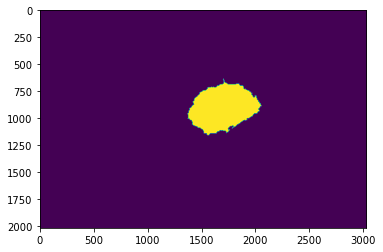

In [96]:
plt.imshow(image)

Up/Down Symmetry: 80.44%
Left/Right Symmetry: 61.47%


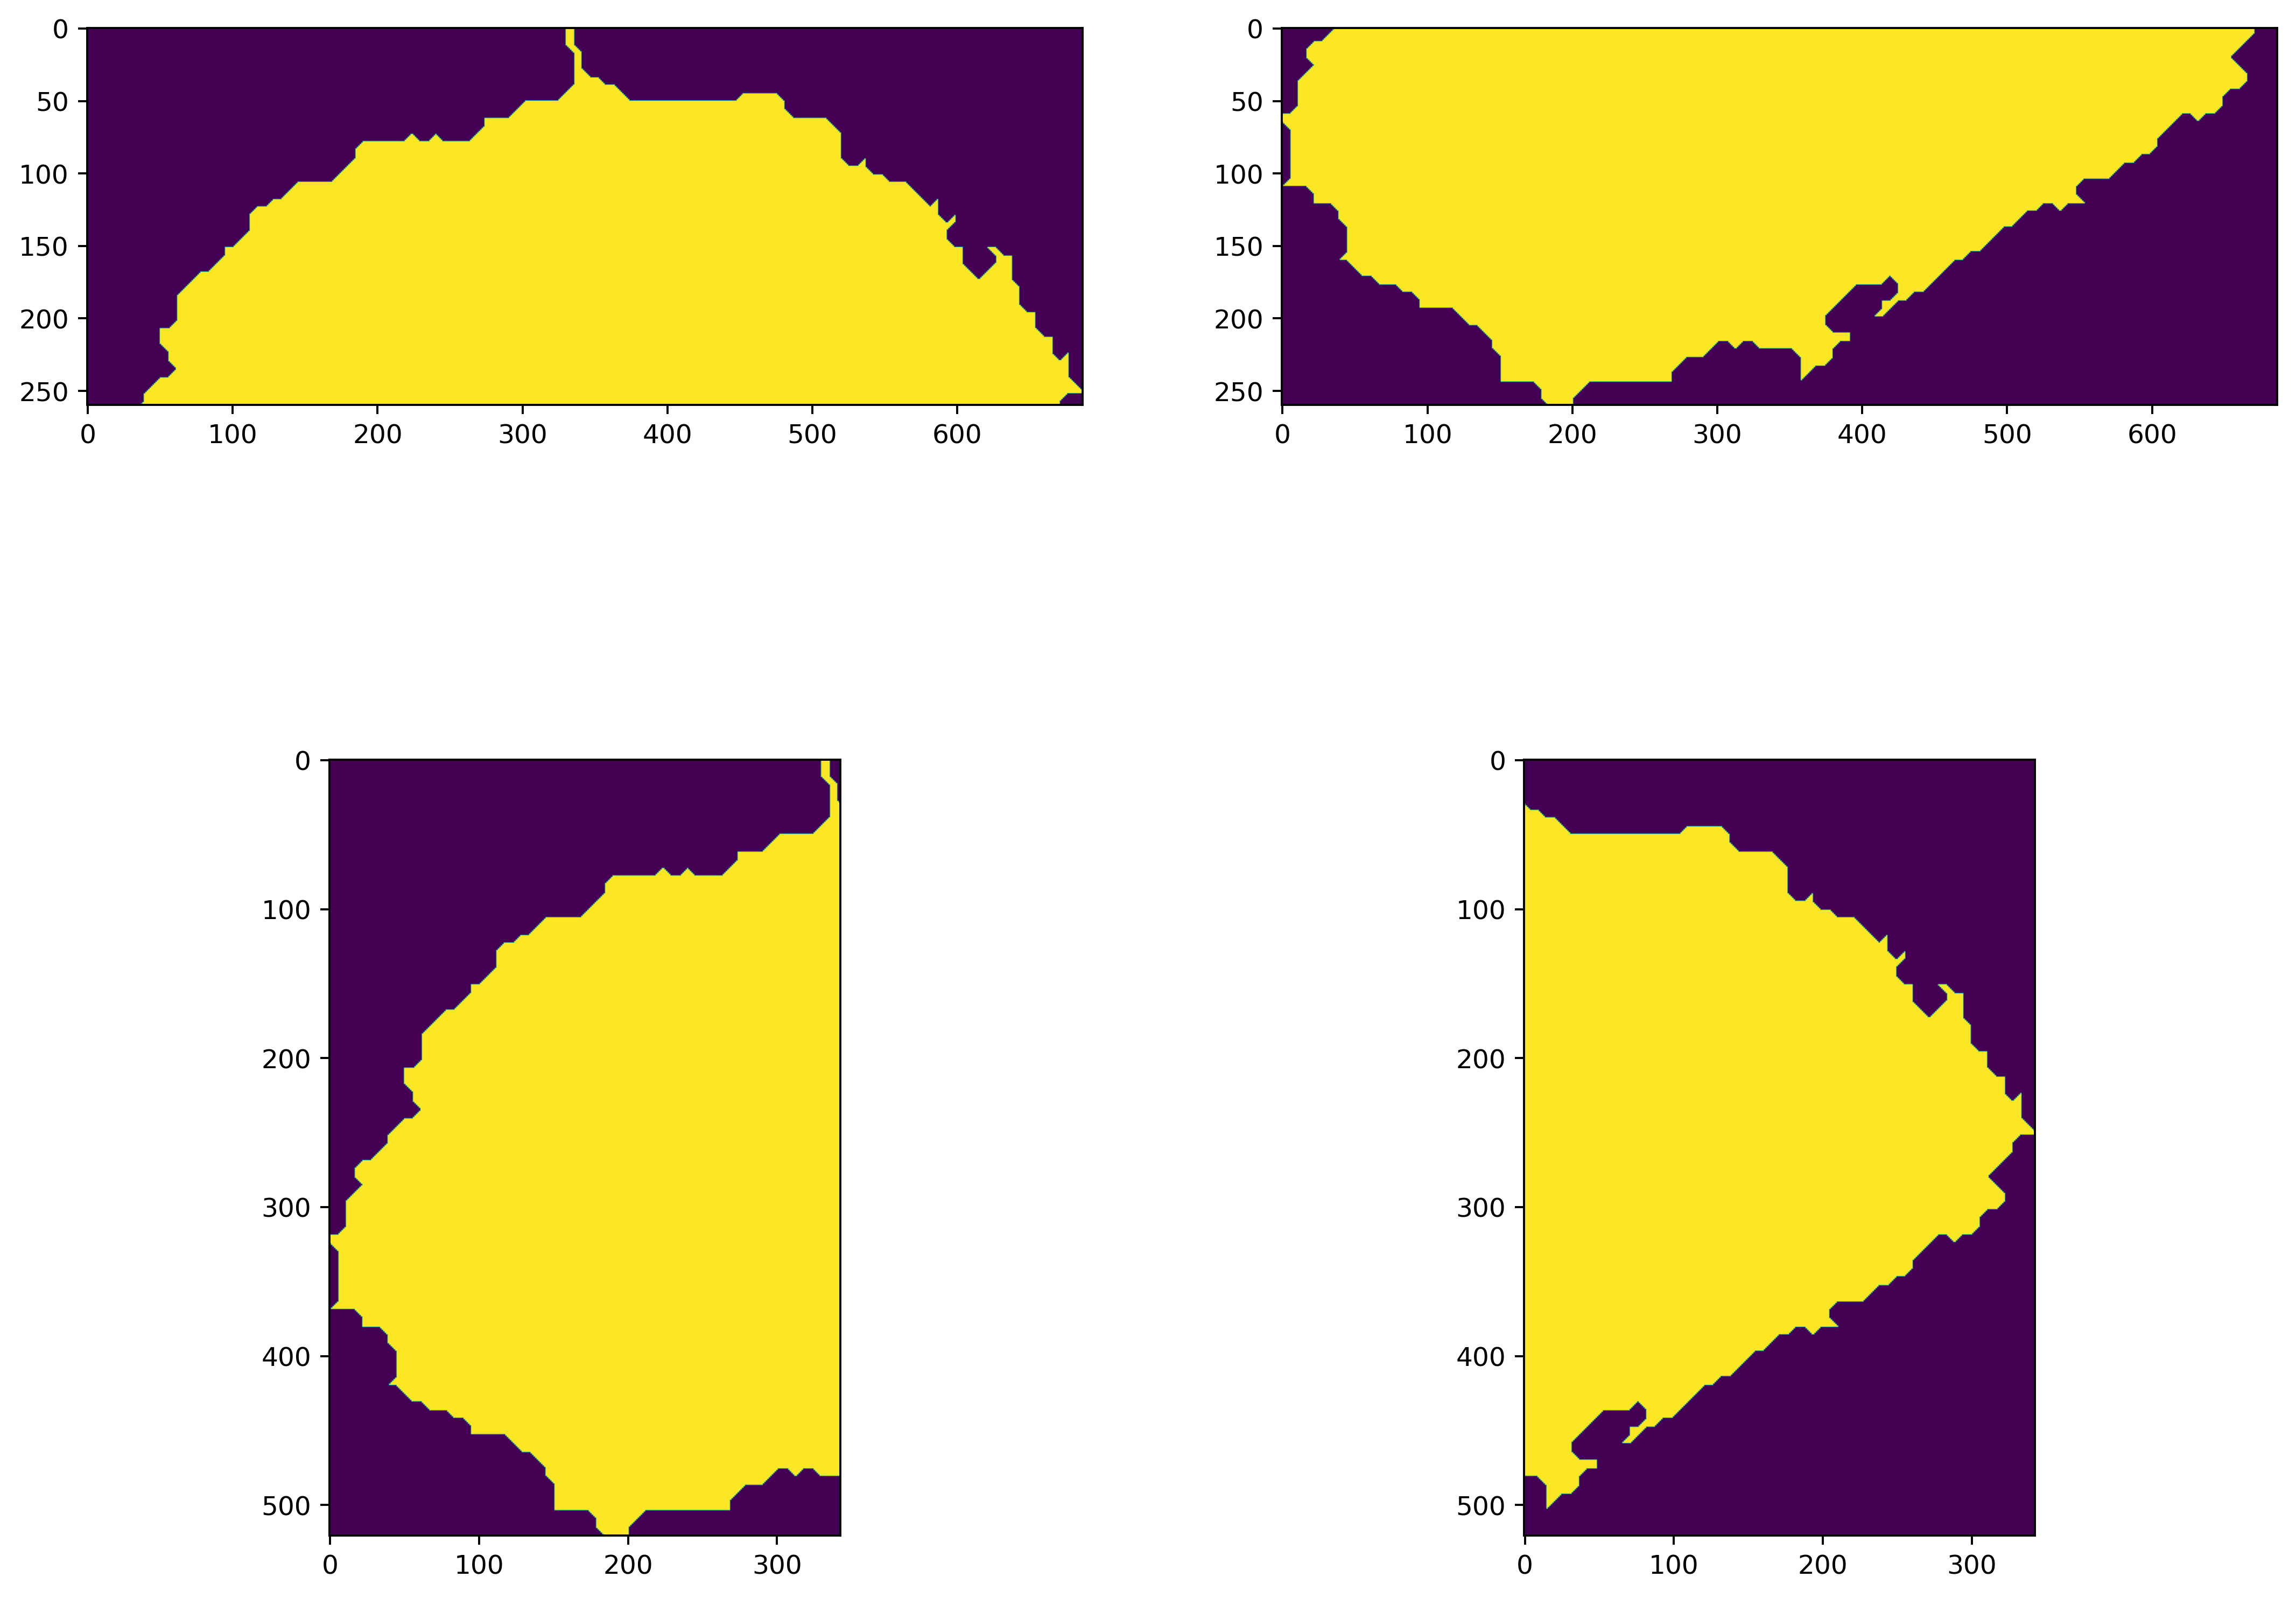

In [237]:
def get_boundaries(image):
    mask = np.where(image == 1)
    left = min(mask[1])
    right = max(mask[1])
    upper = min(mask[0])
    lower = max(mask[0])
    return upper, lower, left, right

def get_center(image):
    up, dw, lt, rt = get_boundaries(image)
    center = ((up + dw)//2,(rt + lt)//2)
    return center
    
def zoom(image):
    up, dw, lt, rt = get_boundaries(image)
    if (dw % 2) == 0:
        dw +=1 
    elif (rt % 2) == 0:
        rt +=1
    rectangle = image[up:dw, lt:rt]
    return rectangle

def test_symmetry(image):
    z = zoom(image)
    up, dw, lt, rt = get_boundaries(z)
    center = get_center(z)
    upside = z[up:center[0],:]
    downside = z[center[0]:dw,:]
    leftside = z[:,lt:center[1]]
    rightside = z[:,center[1]:rt]
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,12), dpi=350)
    ax1.imshow(upside)
    ax2.imshow(downside)
    ax3.imshow(leftside)
    ax4.imshow(rightside)
    
    up_dw = np.sum(np.equal(upside, np.flipud(downside))) / (np.shape(upside)[0] * np.shape(upside)[1])
    print(f'Up/Down Symmetry: {up_dw:.2%}')
    
    lt_rt = np.sum(np.equal(leftside, np.flipud(rightside))) / (np.shape(leftside)[0] * np.shape(leftside)[1])
    print(f'Left/Right Symmetry: {lt_rt:.2%}')


    
    
    
test_symmetry(image)